# Testing the Data using Julia

Load the packages:

- DataFrames: DataFrame package
-  CSVFiles: to load method.
- Query: To macros @map, @mutate to transform the DF.

In [36]:
using DataFrames
using CSVFiles
using Query

Load the data as DataFrame

In [37]:
df = load("fitness_df.csv") |> DataFrame

6551×14 DataFrame. Omitted printing of 7 columns
│ Row  │       │ F1       │ F2    │ best     │ current  │ itera │ val1  │
│      │ Int64 │ Float64  │ Int64 │ Float64  │ Float64  │ Int64 │ Int64 │
├──────┼───────┼──────────┼───────┼──────────┼──────────┼───────┼───────┤
│ 1    │ 0     │ 0.993464 │ 7     │ 0.993464 │ 0.993464 │ 1     │ 26    │
│ 2    │ 1     │ 0.993464 │ 7     │ 0.993464 │ 7.0      │ 2     │ 26    │
│ 3    │ 2     │ 0.993464 │ 7     │ 0.993464 │ 0.993464 │ 3     │ 42    │
│ 4    │ 3     │ 0.993464 │ 7     │ 0.993464 │ 7.0      │ 4     │ 42    │
│ 5    │ 4     │ 0.993464 │ 7     │ 0.993464 │ 0.993464 │ 5     │ 40    │
│ 6    │ 5     │ 0.993464 │ 7     │ 0.993464 │ 7.0      │ 6     │ 40    │
│ 7    │ 6     │ 0.993464 │ 7     │ 0.993464 │ 0.993464 │ 7     │ 32    │
│ 8    │ 7     │ 0.993464 │ 7     │ 0.993464 │ 7.0      │ 8     │ 32    │
│ 9    │ 8     │ 0.996742 │ 10    │ 0.993464 │ 0.996742 │ 9     │ 15    │
│ 10   │ 9     │ 0.996742 │ 10    │ 0.993464 │ 10.0     │ 10    │ 15    │
⋮
│ 6541 │ 6540  │ 0.996742 │ 8     │ 0.929586 │ 0.996742 │ 6541  │ 41    │
│ 6542 │ 6541  │ 0.996742 │ 8     │ 0.929586 │ 8.0      │ 6542  │ 41    │
│ 6543 │ 6542  │ 0.993464 │ 7     │ 0.929586 │ 0.993464 │ 6543  │ 30    │
│ 6544 │ 6543  │ 0.993464 │ 7     │ 0.929586 │ 7.0      │ 6544  │ 30    │
│ 6545 │ 6544  │ 0.996742 │ 7     │ 0.929586 │ 0.996742 │ 6545  │ 35    │
│ 6546 │ 6545  │ 0.996742 │ 7     │ 0.929586 │ 7.0      │ 6546  │ 35    │
│ 6547 │ 6546  │ 0.996742 │ 7     │ 0.929586 │ 0.996742 │ 6547  │ 20    │
│ 6548 │ 6547  │ 0.996742 │ 7     │ 0.929586 │ 7.0      │ 6548  │ 20    │
│ 6549 │ 6548  │ 0.993464 │ 7     │ 0.929586 │ 0.993464 │ 6549  │ 41    │
│ 6550 │ 6549  │ 0.993464 │ 7     │ 0.929586 │ 7.0      │ 6550  │ 41    │
│ 6551 │ 6550  │ 0.993464 │ 7     │ 0.929586 │ 0.993464 │ 6551  │ 34    │

Remove the unused index (new syntax).

In [38]:
df = select(df, Not([1, 4, 5]))

6551×11 DataFrame. Omitted printing of 3 columns
│ Row  │ F1       │ F2    │ itera │ val1  │ val2  │ val3  │ val4  │ val5  │
│      │ Float64  │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├──────┼──────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1    │ 0.993464 │ 7     │ 1     │ 26    │ 363   │ 237   │ 0     │ 194   │
│ 2    │ 0.993464 │ 7     │ 2     │ 26    │ 363   │ 237   │ 0     │ 194   │
│ 3    │ 0.993464 │ 7     │ 3     │ 42    │ 1205  │ 208   │ 0     │ 108   │
│ 4    │ 0.993464 │ 7     │ 4     │ 42    │ 1205  │ 208   │ 0     │ 108   │
│ 5    │ 0.993464 │ 7     │ 5     │ 40    │ 884   │ 137   │ 0     │ 36    │
│ 6    │ 0.993464 │ 7     │ 6     │ 40    │ 884   │ 137   │ 0     │ 36    │
│ 7    │ 0.993464 │ 7     │ 7     │ 32    │ 1148  │ 268   │ 0     │ 223   │
│ 8    │ 0.993464 │ 7     │ 8     │ 32    │ 1148  │ 268   │ 0     │ 223   │
│ 9    │ 0.996742 │ 10    │ 9     │ 15    │ 86    │ 290   │ 0     │ 245   │
│ 10   │ 0.996742 │ 10    │ 10    │ 15    │ 86    │ 290   │ 0     │ 245   │
⋮
│ 6541 │ 0.996742 │ 8     │ 6541  │ 41    │ 727   │ 149   │ 0     │ 293   │
│ 6542 │ 0.996742 │ 8     │ 6542  │ 41    │ 727   │ 149   │ 0     │ 293   │
│ 6543 │ 0.993464 │ 7     │ 6543  │ 30    │ 1096  │ 109   │ 0     │ 203   │
│ 6544 │ 0.993464 │ 7     │ 6544  │ 30    │ 1096  │ 109   │ 0     │ 203   │
│ 6545 │ 0.996742 │ 7     │ 6545  │ 35    │ 906   │ 140   │ 0     │ 212   │
│ 6546 │ 0.996742 │ 7     │ 6546  │ 35    │ 906   │ 140   │ 0     │ 212   │
│ 6547 │ 0.996742 │ 7     │ 6547  │ 20    │ 653   │ 125   │ 0     │ 198   │
│ 6548 │ 0.996742 │ 7     │ 6548  │ 20    │ 653   │ 125   │ 0     │ 198   │
│ 6549 │ 0.993464 │ 7     │ 6549  │ 41    │ 630   │ 161   │ 0     │ 288   │
│ 6550 │ 0.993464 │ 7     │ 6550  │ 41    │ 630   │ 161   │ 0     │ 288   │
│ 6551 │ 0.993464 │ 7     │ 6551  │ 34    │ 967   │ 169   │ 0     │ 244   │

# Insert the difference (for calculate distance)

Create diff as val1 + val6, because that combination has a influence over the distance.

In [39]:
df = df |> @mutate(diff=_.val1+_.val6) |> DataFrame;
df = df |> @mutate(category= if (_.F1 > 0.99674 && _.F2 == 7 && _.diff > 0) "best" else "normal" end) |> DataFrame

6551×13 DataFrame. Omitted printing of 5 columns
│ Row  │ F1       │ F2    │ itera │ val1  │ val2  │ val3  │ val4  │ val5  │
│      │ Float64  │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├──────┼──────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1    │ 0.993464 │ 7     │ 1     │ 26    │ 363   │ 237   │ 0     │ 194   │
│ 2    │ 0.993464 │ 7     │ 2     │ 26    │ 363   │ 237   │ 0     │ 194   │
│ 3    │ 0.993464 │ 7     │ 3     │ 42    │ 1205  │ 208   │ 0     │ 108   │
│ 4    │ 0.993464 │ 7     │ 4     │ 42    │ 1205  │ 208   │ 0     │ 108   │
│ 5    │ 0.993464 │ 7     │ 5     │ 40    │ 884   │ 137   │ 0     │ 36    │
│ 6    │ 0.993464 │ 7     │ 6     │ 40    │ 884   │ 137   │ 0     │ 36    │
│ 7    │ 0.993464 │ 7     │ 7     │ 32    │ 1148  │ 268   │ 0     │ 223   │
│ 8    │ 0.993464 │ 7     │ 8     │ 32    │ 1148  │ 268   │ 0     │ 223   │
│ 9    │ 0.996742 │ 10    │ 9     │ 15    │ 86    │ 290   │ 0     │ 245   │
│ 10   │ 0.996742 │ 10    │ 10    │ 15    │ 86    │ 290   │ 0     │ 245   │
⋮
│ 6541 │ 0.996742 │ 8     │ 6541  │ 41    │ 727   │ 149   │ 0     │ 293   │
│ 6542 │ 0.996742 │ 8     │ 6542  │ 41    │ 727   │ 149   │ 0     │ 293   │
│ 6543 │ 0.993464 │ 7     │ 6543  │ 30    │ 1096  │ 109   │ 0     │ 203   │
│ 6544 │ 0.993464 │ 7     │ 6544  │ 30    │ 1096  │ 109   │ 0     │ 203   │
│ 6545 │ 0.996742 │ 7     │ 6545  │ 35    │ 906   │ 140   │ 0     │ 212   │
│ 6546 │ 0.996742 │ 7     │ 6546  │ 35    │ 906   │ 140   │ 0     │ 212   │
│ 6547 │ 0.996742 │ 7     │ 6547  │ 20    │ 653   │ 125   │ 0     │ 198   │
│ 6548 │ 0.996742 │ 7     │ 6548  │ 20    │ 653   │ 125   │ 0     │ 198   │
│ 6549 │ 0.993464 │ 7     │ 6549  │ 41    │ 630   │ 161   │ 0     │ 288   │
│ 6550 │ 0.993464 │ 7     │ 6550  │ 41    │ 630   │ 161   │ 0     │ 288   │
│ 6551 │ 0.993464 │ 7     │ 6551  │ 34    │ 967   │ 169   │ 0     │ 244   │

In [40]:
df_best = df |> @filter(_.F1 > 0.9967) |> @filter(_.F2 == 7) |> DataFrame;

Show the range and types of each column.

In [41]:
describe(df |> @filter(_.category == "best") |> DataFrame)

13×8 DataFrame. Omitted printing of 2 columns
│ Row │ variable │ mean     │ min      │ median   │ max      │ nunique │
│     │ Symbol   │ Union…   │ Any      │ Union…   │ Any      │ Union…  │
├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┤
│ 1   │ F1       │ 0.996742 │ 0.996742 │ 0.996742 │ 0.996742 │         │
│ 2   │ F2       │ 7.0      │ 7        │ 7.0      │ 7        │         │
│ 3   │ itera    │ 3234.88  │ 57       │ 3247.5   │ 6548     │         │
│ 4   │ val1     │ 35.6853  │ 15       │ 37.0     │ 50       │         │
│ 5   │ val2     │ 809.517  │ 320      │ 787.0    │ 1620     │         │
│ 6   │ val3     │ 173.739  │ 0        │ 176.0    │ 300      │         │
│ 7   │ val4     │ 0.0      │ 0        │ 0.0      │ 0        │         │
│ 8   │ val5     │ 242.307  │ 0        │ 252.0    │ 300      │         │
│ 9   │ val6     │ -27.2281 │ -41      │ -28.0    │ -12      │         │
│ 10  │ val7     │ 81.0011  │ 0        │ 73.0     │ 300      │         │
│ 11  │ val8     │ 12946.1  │ 0        │ 13585.0  │ 20000    │         │
│ 12  │ diff     │ 8.45727  │ 1        │ 8.0      │ 16       │         │
│ 13  │ category │          │ best     │          │ best     │ 1       │

In [42]:
describe(df)

13×8 DataFrame. Omitted printing of 2 columns
│ Row │ variable │ mean     │ min      │ median   │ max      │ nunique │
│     │ Symbol   │ Union…   │ Any      │ Union…   │ Any      │ Union…  │
├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┤
│ 1   │ F1       │ 0.995437 │ 0.929586 │ 0.996742 │ 0.996742 │         │
│ 2   │ F2       │ 7.15036  │ 7        │ 7.0      │ 14       │         │
│ 3   │ itera    │ 3276.0   │ 1        │ 3276.0   │ 6551     │         │
│ 4   │ val1     │ 34.5505  │ 0        │ 36.0     │ 50       │         │
│ 5   │ val2     │ 795.262  │ 0        │ 772.0    │ 2000     │         │
│ 6   │ val3     │ 168.659  │ 0        │ 171.0    │ 300      │         │
│ 7   │ val4     │ 0.0      │ 0        │ 0.0      │ 0        │         │
│ 8   │ val5     │ 235.289  │ 0        │ 248.0    │ 300      │         │
│ 9   │ val6     │ -24.9696 │ -44      │ -25.0    │ 0        │         │
│ 10  │ val7     │ 78.3572  │ 0        │ 70.0     │ 300      │         │
│ 11  │ val8     │ 12576.3  │ 0        │ 13126.0  │ 20000    │         │
│ 12  │ diff     │ 9.58083  │ 0        │ 9.0      │ 40       │         │
│ 13  │ category │          │ best     │          │ normal   │ 2       │

Use Voyager() to visualize and browser around the attributes.

In [43]:
# df |> Voyager()

In [44]:
df |> @filter(_.category == "best") |> @select(:itera)

?x1 query result
itera
─────
57   
58   
69   
70   
81   
82   
83   
84   
97   
98   
... with more rows

# Visualize differences between variables and best solution

In [45]:
using VegaLite, Gadfly

In [46]:
values_col = filter(row-> occursin("val", string(row)), names(df))

8-element Array{Symbol,1}:
 :val1
 :val2
 :val3
 :val4
 :val5
 :val6
 :val7
 :val8

In [47]:
df_stack = stack(df, values_col) |> @mutate(cat="all") |> DataFrame;

In [48]:
df_best_stack = stack(df_best, values_col) |> @mutate(cat="best") |> DataFrame;

In [49]:
df

6551×13 DataFrame. Omitted printing of 5 columns
│ Row  │ F1       │ F2    │ itera │ val1  │ val2  │ val3  │ val4  │ val5  │
│      │ Float64  │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │
├──────┼──────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1    │ 0.993464 │ 7     │ 1     │ 26    │ 363   │ 237   │ 0     │ 194   │
│ 2    │ 0.993464 │ 7     │ 2     │ 26    │ 363   │ 237   │ 0     │ 194   │
│ 3    │ 0.993464 │ 7     │ 3     │ 42    │ 1205  │ 208   │ 0     │ 108   │
│ 4    │ 0.993464 │ 7     │ 4     │ 42    │ 1205  │ 208   │ 0     │ 108   │
│ 5    │ 0.993464 │ 7     │ 5     │ 40    │ 884   │ 137   │ 0     │ 36    │
│ 6    │ 0.993464 │ 7     │ 6     │ 40    │ 884   │ 137   │ 0     │ 36    │
│ 7    │ 0.993464 │ 7     │ 7     │ 32    │ 1148  │ 268   │ 0     │ 223   │
│ 8    │ 0.993464 │ 7     │ 8     │ 32    │ 1148  │ 268   │ 0     │ 223   │
│ 9    │ 0.996742 │ 10    │ 9     │ 15    │ 86    │ 290   │ 0     │ 245   │
│ 10   │ 0.996742 │ 10    │ 10    │ 15    │ 86    │ 290   │ 0     │ 245   │
⋮
│ 6541 │ 0.996742 │ 8     │ 6541  │ 41    │ 727   │ 149   │ 0     │ 293   │
│ 6542 │ 0.996742 │ 8     │ 6542  │ 41    │ 727   │ 149   │ 0     │ 293   │
│ 6543 │ 0.993464 │ 7     │ 6543  │ 30    │ 1096  │ 109   │ 0     │ 203   │
│ 6544 │ 0.993464 │ 7     │ 6544  │ 30    │ 1096  │ 109   │ 0     │ 203   │
│ 6545 │ 0.996742 │ 7     │ 6545  │ 35    │ 906   │ 140   │ 0     │ 212   │
│ 6546 │ 0.996742 │ 7     │ 6546  │ 35    │ 906   │ 140   │ 0     │ 212   │
│ 6547 │ 0.996742 │ 7     │ 6547  │ 20    │ 653   │ 125   │ 0     │ 198   │
│ 6548 │ 0.996742 │ 7     │ 6548  │ 20    │ 653   │ 125   │ 0     │ 198   │
│ 6549 │ 0.993464 │ 7     │ 6549  │ 41    │ 630   │ 161   │ 0     │ 288   │
│ 6550 │ 0.993464 │ 7     │ 6550  │ 41    │ 630   │ 161   │ 0     │ 288   │
│ 6551 │ 0.993464 │ 7     │ 6551  │ 34    │ 967   │ 169   │ 0     │ 244   │

In [50]:
all_stack = stack(df, values_col) |> DataFrame

52408×7 DataFrame
│ Row   │ variable │ value │ F1       │ F2    │ itera │ diff  │ category │
│       │ Symbol   │ Int64 │ Float64  │ Int64 │ Int64 │ Int64 │ String   │
├───────┼──────────┼───────┼──────────┼───────┼───────┼───────┼──────────┤
│ 1     │ val1     │ 26    │ 0.993464 │ 7     │ 1     │ 15    │ normal   │
│ 2     │ val1     │ 26    │ 0.993464 │ 7     │ 2     │ 15    │ normal   │
│ 3     │ val1     │ 42    │ 0.993464 │ 7     │ 3     │ 32    │ normal   │
│ 4     │ val1     │ 42    │ 0.993464 │ 7     │ 4     │ 32    │ normal   │
│ 5     │ val1     │ 40    │ 0.993464 │ 7     │ 5     │ 13    │ normal   │
│ 6     │ val1     │ 40    │ 0.993464 │ 7     │ 6     │ 13    │ normal   │
│ 7     │ val1     │ 32    │ 0.993464 │ 7     │ 7     │ 15    │ normal   │
│ 8     │ val1     │ 32    │ 0.993464 │ 7     │ 8     │ 15    │ normal   │
│ 9     │ val1     │ 15    │ 0.996742 │ 10    │ 9     │ 2     │ normal   │
│ 10    │ val1     │ 15    │ 0.996742 │ 10    │ 10    │ 2     │ normal   │
⋮
│ 52398 │ val8     │ 13120 │ 0.996742 │ 8     │ 6541  │ 10    │ normal   │
│ 52399 │ val8     │ 13120 │ 0.996742 │ 8     │ 6542  │ 10    │ normal   │
│ 52400 │ val8     │ 1852  │ 0.993464 │ 7     │ 6543  │ 9     │ normal   │
│ 52401 │ val8     │ 1852  │ 0.993464 │ 7     │ 6544  │ 9     │ normal   │
│ 52402 │ val8     │ 7900  │ 0.996742 │ 7     │ 6545  │ 8     │ best     │
│ 52403 │ val8     │ 7900  │ 0.996742 │ 7     │ 6546  │ 8     │ best     │
│ 52404 │ val8     │ 4287  │ 0.996742 │ 7     │ 6547  │ 4     │ best     │
│ 52405 │ val8     │ 4287  │ 0.996742 │ 7     │ 6548  │ 4     │ best     │
│ 52406 │ val8     │ 13381 │ 0.993464 │ 7     │ 6549  │ 24    │ normal   │
│ 52407 │ val8     │ 13381 │ 0.993464 │ 7     │ 6550  │ 24    │ normal   │
│ 52408 │ val8     │ 11749 │ 0.993464 │ 7     │ 6551  │ 12    │ normal   │

In [51]:
# using Gadfly
using Cairo

In [52]:
# using Pkg; Pkg.add("Cairo"); Pkg.build("Cairo")
# using Cairo

In [53]:
using StatsPlots

In [54]:
plots = Int[]
for val in 1:3
    append!(plots, val)
end
println(plots)

[1, 2, 3]


In [55]:
value=:val1
Gadfly.set_default_plot_size(10cm, 10cm)
plots = Plot[]

function get_plot(df, value)
    Gadfly.plot(all_stack |> @filter(_.variable==value) |> @filter(_.itera > 0) |> DataFrame, 
    x=:category, y=:value, 
    color=:category, 
    Geom.boxplot,
    Theme(boxplot_spacing=30px),
    Guide.xticks(ticks=[1,1]),
    Guide.xlabel("Category"), Guide.ylabel("Value"), 
    Guide.title("Parámetro $(value)"))
end

for value in values_col
    p = get_plot(df, value) # |> PNG("box_$(value).png")
    display(p)
end



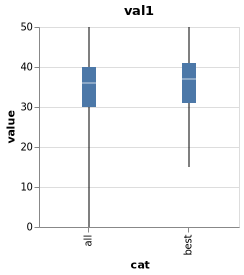

In [56]:
#for value in [:val1]
value = :val1
vcat(df_stack, df_best_stack) |> @filter(_.variable == value) |> @vlplot( mark={:boxplot, extent="min-max"}, title=string(value), x="cat:o", y=:value, width=200)
#end

# Numerical dependencies

We are going to study the lineal dependencies using the [GML.jl package](https://github.com/JuliaStats/GLM.jl).

In [57]:
using GLM

In [58]:
# using VegaLite

In [59]:
ols = lm(@formula(F1 ~ val1+val6), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

F1 ~ 1 + val1 + val6

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                 Estimate   Std. Error    t value  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.989678     0.000193795  5106.82      <1e-99   0.989298      0.990058   
val1         -1.17686e-5   1.05331e-5     -1.1173    0.2639  -3.24168e-5    8.87972e-6 
val6         -0.000246943  1.17716e-5    -20.9778    <1e-93  -0.000270019  -0.000223867
───────────────────────────────────────────────────────────────────────────────────────

In [60]:
ols=lm(@formula(F2 ~ val6), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

F2 ~ 1 + val6

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
               Estimate   Std. Error    t value  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   7.11437    0.0251606    282.759      <1e-99   7.06504     7.16369    
val6         -0.0014414  0.000973295   -1.48095    0.1387  -0.00334937  0.000466579
───────────────────────────────────────────────────────────────────────────────────

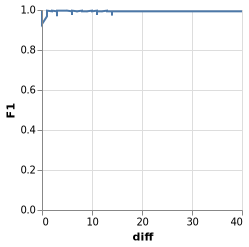

In [61]:
df |> @vlplot(mark={:line}, x=:diff, y="F1")

In [62]:
values_col = filter(row-> occursin("val", string(row)), names(df))

8-element Array{Symbol,1}:
 :val1
 :val2
 :val3
 :val4
 :val5
 :val6
 :val7
 :val8

In [63]:
cols = vcat(values_col, :F1)

9-element Array{Symbol,1}:
 :val1
 :val2
 :val3
 :val4
 :val5
 :val6
 :val7
 :val8
 :F1  

In [64]:
df_stack = stack(df[!, cols], values_col)

52408×3 DataFrame
│ Row   │ variable │ value │ F1       │
│       │ Symbol   │ Int64 │ Float64  │
├───────┼──────────┼───────┼──────────┤
│ 1     │ val1     │ 26    │ 0.993464 │
│ 2     │ val1     │ 26    │ 0.993464 │
│ 3     │ val1     │ 42    │ 0.993464 │
│ 4     │ val1     │ 42    │ 0.993464 │
│ 5     │ val1     │ 40    │ 0.993464 │
│ 6     │ val1     │ 40    │ 0.993464 │
│ 7     │ val1     │ 32    │ 0.993464 │
│ 8     │ val1     │ 32    │ 0.993464 │
│ 9     │ val1     │ 15    │ 0.996742 │
│ 10    │ val1     │ 15    │ 0.996742 │
⋮
│ 52398 │ val8     │ 13120 │ 0.996742 │
│ 52399 │ val8     │ 13120 │ 0.996742 │
│ 52400 │ val8     │ 1852  │ 0.993464 │
│ 52401 │ val8     │ 1852  │ 0.993464 │
│ 52402 │ val8     │ 7900  │ 0.996742 │
│ 52403 │ val8     │ 7900  │ 0.996742 │
│ 52404 │ val8     │ 4287  │ 0.996742 │
│ 52405 │ val8     │ 4287  │ 0.996742 │
│ 52406 │ val8     │ 13381 │ 0.993464 │
│ 52407 │ val8     │ 13381 │ 0.993464 │
│ 52408 │ val8     │ 11749 │ 0.993464 │

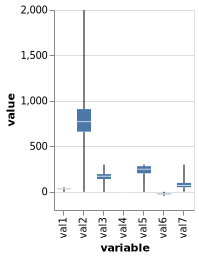

In [65]:
df_stack  |> @filter(_.variable != :val8) |> DataFrame |> @vlplot(mark={:boxplot, extent="min-max"}, x="variable:n", y="value")

In [66]:
# df_stack |> Voyager()